**This notebook demonstrates classification of Fashion MNIST Dataset using Tensorflow and Keras**

First import the libraries tensorflow and matplot library.
Also import the Fashion MNIST dataset from the tensorflow datasets.

In [1]:
import tensorflow as tf  # Imports tensorflow library
import matplotlib.pyplot as plt  # Imports pyplot from matplotlib library
from tensorflow.keras.datasets import fashion_mnist # Imports fashion mnist dataset from tensor flow datasets library

Lets load the Fashion MNIST data from keras library

In [2]:
(x_train, y_train),(x_test,y_test) = fashion_mnist.load_data()

Pre processing of DATA

FIRST visualise the data from the dataset using matplot lib

In [3]:
x_train.shape, x_test.shape

((60000, 28, 28), (10000, 28, 28))

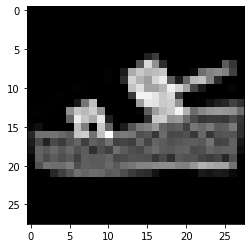

In [4]:
plt.imshow(x_train[12], cmap="gray")
plt.show()

We need to normalise the data by scaling the pixels value in a range from 0 to 1

In [5]:
x_train = tf.keras.utils.normalize(x_train, axis=1) #normalise the train dataset
x_test = tf.keras.utils.normalize(x_test, axis=1) #normalise the test dataset

**Lets built the model !**

Steps:

1. create a model and add different layers
2. Flatten the data by converting 2D images  (28*28) to 1*784
3. Create input and hidden layer with 128 neurons and use activation function 'relu'
4. Create output layer with 10 neurons  (since our classes are 10) and use 'softmax' activation function to transform the score.

In [6]:
model= tf.keras.models.Sequential()  #Built the model object
model.add(tf.keras.layers.Flatten()) #Add the flatten layer

# Build the input and output layers
# Keep changing the batchsize ranging from 32,64,128 
model.add(tf.keras.layers.Dense(32,activation=tf.nn.relu)) 
model.add(tf.keras.layers.Dense(32,activation=tf.nn.relu)) 

# Built the output layer
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax)) 

Compile the model

1. Add optimiser 'adam'
2. Use loa=ss function that will tell us the performance of our model
3. the metrics which give indictive tests of the quality of the model (accuracy)

In [7]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])  #compile the model

Train the model

In [8]:
history=model.fit(x=x_train,y=y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 1s 612us/step - loss: 0.8256 - accuracy: 0.7097
Epoch 2/5
1875/1875 [==============================] - 1s 602us/step - loss: 0.4008 - accuracy: 0.8544
Epoch 3/5
1875/1875 [==============================] - 1s 596us/step - loss: 0.3653 - accuracy: 0.8661
Epoch 4/5
1875/1875 [==============================] - 1s 604us/step - loss: 0.3406 - accuracy: 0.8735
Epoch 5/5
1875/1875 [==============================] - 1s 597us/step - loss: 0.3183 - accuracy: 0.8819


evaluate the model

In [9]:
test_loss, test_acc= model.evaluate(x=x_test,y=y_test)
print('Test_accuracy: ', test_acc)
# Test Accuracy 128 - 87.68
# Test Accuracy 64 - 86.73
# Test Accuracy 32 - 86.11

313/313 [==============================] - 0s 453us/step - loss: 0.3827 - accuracy: 0.8625
Test_accuracy:  0.862500011920929


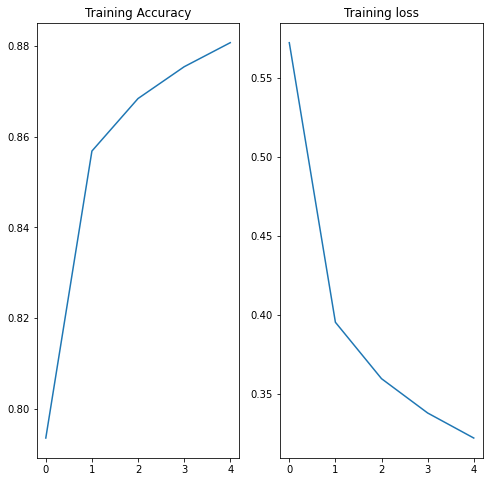

In [10]:
acc=history.history['accuracy']
loss= history.history['loss']
epochs_range= range(5)

plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(epochs_range, acc, label='Training Accuracy')
# plt.legend(loc='Lower right')
plt.title('Training Accuracy')

 
plt.subplot(1,2,2)
plt.plot(epochs_range, loss, label='Training loss')
# plt.legend(loc='Upper right')
plt.title('Training loss')

plt.show()

Make predictions

In [11]:
predictions=model.predict([x_test])

Consider rewriting this model with the Functional API.


In [12]:
import numpy as np
print(np.argmax(predictions[16]))  # Print the number

2


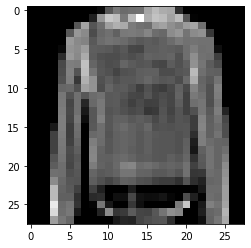

In [13]:
plt.imshow(x_test[16], cmap='gray')  # Import the image
plt.show()                          # Show the image